In [24]:
#libaries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as s
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn import preprocessing 
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [25]:
data = pd.read_csv("C:/Users/Sneha Gupta/Downloads/Food_Delivery_Time_Prediction.csv")
data
# data.isnull().sum()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,Rainy,Medium,4,Medium,Afternoon,Car,4.1,3.0,26.22,1321.10,81.54
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,Cloudy,Medium,8,Low,Night,Car,4.5,4.2,62.61,152.21,29.02
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,Snowy,Medium,9,High,Night,Bike,3.3,3.4,48.43,1644.38,64.17
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,Cloudy,Low,2,Medium,Evening,Bike,3.2,3.7,111.63,541.25,79.23
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,Rainy,High,6,Low,Night,Bike,3.5,2.8,32.38,619.81,2.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,ORD0196,"(17.910045, 81.56199)","(18.098924, 87.896124)",23.82,Cloudy,High,8,Medium,Night,Bike,4.7,4.0,50.39,1432.26,66.34
196,ORD0197,"(21.66459, 82.226635)","(16.892341, 80.554716)",6.09,Snowy,Medium,8,Low,Night,Bicycle,3.0,3.6,90.54,1720.25,40.27
197,ORD0198,"(14.575401, 82.55641)","(13.625369, 82.418092)",20.61,Snowy,High,4,Medium,Afternoon,Bike,2.9,3.4,73.20,1356.58,5.10
198,ORD0199,"(12.094497, 82.893369)","(19.135509, 86.659978)",24.06,Rainy,High,9,Low,Night,Car,3.9,4.8,53.94,354.39,85.25


In [26]:
#encoding = converting data into binary form
le = LabelEncoder()
data['Weather_Conditions'] = le.fit_transform(data['Weather_Conditions'])

data['Traffic_Conditions'] = le.fit_transform(data['Traffic_Conditions'])

data['Vehicle_Type '] = le.fit_transform(data['Vehicle_Type'])
data['Order_Priority'] = le.fit_transform(data['Order_Priority'])

In [27]:
#normalize - convert data in mean and Standard deviation
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
data[['Distance','Delivery_Time','Order_Cost']] = mm.fit_transform(data[['Distance','Delivery_Time','Order_Cost']])


## step2

In [28]:
#mean,median,variance min ,max etc
numeric_data = data.select_dtypes(include=[np.number])
print("Median:", numeric_data.median(numeric_only = True))
print("Mode:", numeric_data.mode().iloc[0])
print("Variance:", numeric_data.var())
corr = numeric_data.corr
# data.describe()

Median: Distance                       0.399713
Weather_Conditions             2.000000
Traffic_Conditions             1.000000
Delivery_Person_Experience     5.000000
Order_Priority                 1.000000
Restaurant_Rating              3.800000
Customer_Rating                3.700000
Delivery_Time                  0.550986
Order_Cost                     0.487249
Tip_Amount                    47.530000
Vehicle_Type                   1.000000
dtype: float64
Mode: Distance                      0.032814
Weather_Conditions            1.000000
Traffic_Conditions            1.000000
Delivery_Person_Experience    8.000000
Order_Priority                1.000000
Restaurant_Rating             3.800000
Customer_Rating               2.600000
Delivery_Time                 0.494159
Order_Cost                    0.901782
Tip_Amount                    2.220000
Vehicle_Type                  0.000000
Name: 0, dtype: float64
Variance: Distance                        0.078753
Weather_Conditions         

<Axes: xlabel='Distance', ylabel='Delivery_Time'>

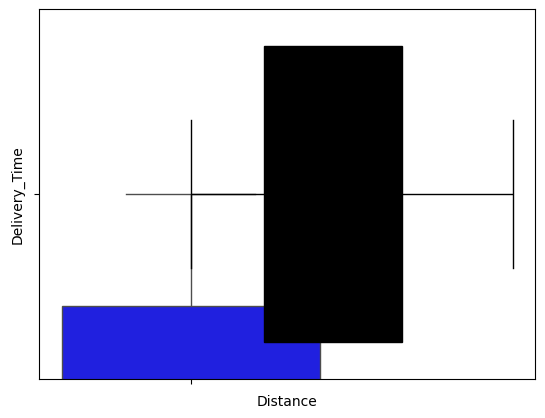

In [29]:
#to check outlier
s.boxplot(data['Delivery_Time'],color= 'blue')
s.boxplot(x=data['Distance'],color = 'black')

In [30]:
# 
x = data[['Distance', 'Traffic_Conditions','Order_Priority']]
y = data['Delivery_Time']


In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [32]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [33]:
y_pred = reg.predict(x_test)

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MSE: 0.08299790253994607
R² Score: -0.007683886909147342


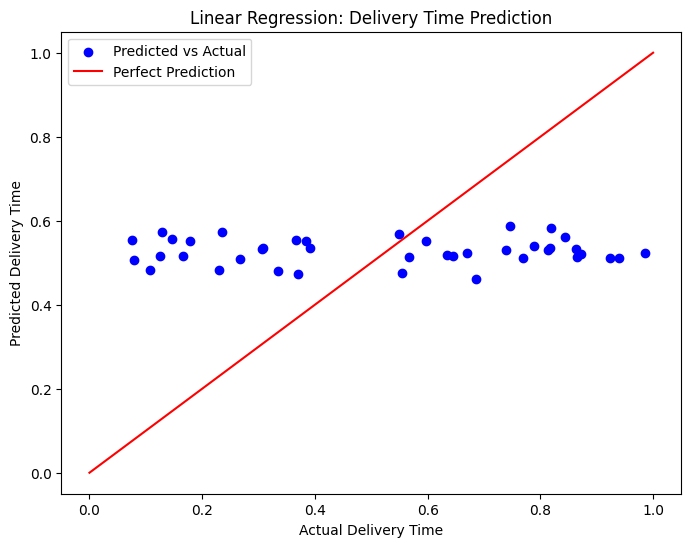

In [34]:

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r-', label='Perfect Prediction')
plt.xlabel("Actual Delivery Time")
plt.ylabel("Predicted Delivery Time")
plt.title("Linear Regression: Delivery Time Prediction")
plt.legend()
plt.show()

In [35]:
threshold = data['Delivery_Time'].median()
data['Fast_Delivery'] = (data['Delivery_Time'] < threshold).astype(int)

In [36]:

X1 = data[['Distance', 'Traffic_Conditions','Order_Priority']]
y1 = data['Fast_Delivery']

In [37]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X1, y1, test_size=0.2)

In [38]:
lg = LogisticRegression()
lg.fit(X1_train, y1_train)
y_prediction = lg.predict(X1_test)

In [39]:
confusion_matrix(y1_test, y_prediction)
classification_report(y1_test,y_prediction)

'              precision    recall  f1-score   support\n\n           0       0.48      0.58      0.52        19\n           1       0.53      0.43      0.47        21\n\n    accuracy                           0.50        40\n   macro avg       0.50      0.50      0.50        40\nweighted avg       0.51      0.50      0.50        40\n'

In [40]:
print(accuracy_score(y1_test,y_prediction))

0.5


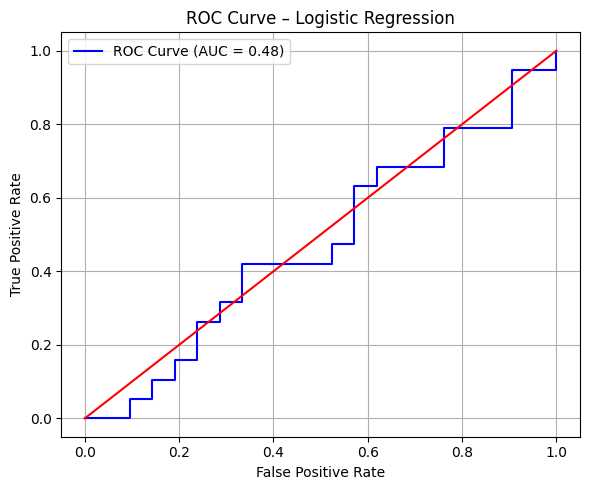

In [19]:

y_prob = lg.predict_proba(X1_test)[:, 1]  # Probabilities for class 1

fpr, tpr, thresholds = roc_curve(y1_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='-')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Logistic Regression")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

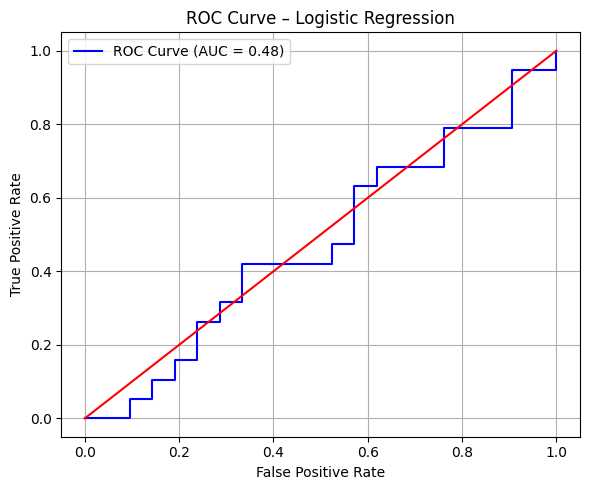

In [19]:

y_prob = lg.predict_proba(X1_test)[:, 1]  # Probabilities for class 1

fpr, tpr, thresholds = roc_curve(y1_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='-')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Logistic Regression")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()